<a href="https://colab.research.google.com/github/NeonLabs146/General_stuffs/blob/main/Rain_fall_detection_Nepal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

**For Nepal rainfall Data**

In [114]:
ndf = pd.read_csv('/content/Nepal-annual-rainfall-by-station-in-mm.csv')

In [115]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Station  424 non-null    object 
 1   2013     341 non-null    float64
 2   2014     345 non-null    float64
 3   2015     365 non-null    float64
 4   2016     366 non-null    float64
 5   2017     341 non-null    float64
dtypes: float64(5), object(1)
memory usage: 20.0+ KB


In [116]:
ndf.describe()

,2013,2014,2015,2016,2017
count,341.000000,345.000000,365.000000,366.000000,341.000000
mean,1950.672727,1735.713043,1568.716986,1822.419399,1681.507625
std,902.793193,876.254669,818.200289,972.568915,808.480955
min,270.300000,244.400000,253.900000,99.700000,128.500000
25%,1319.400000,1189.700000,1020.000000,1208.450000,1142.500000
50%,1820.100000,1548.900000,1373.800000,1590.900000,1517.100000
75%,2433.100000,2086.200000,1900.800000,2199.850000,1975.600000
max,6512.200000,5203.000000,5138.700000,6737.400000,5030.400000


In [117]:
ndf.isnull().sum()

Station     0
2013       83
2014       79
2015       59
2016       58
2017       83
dtype: int64

In [118]:
ndf.fillna(0, inplace=True)

In [119]:
ndf.isnull().sum()

Station    0
2013       0
2014       0
2015       0
2016       0
2017       0
dtype: int64

In [120]:
ndf.head()

,Station,2013,2014,2015,2016,2017
0,Agimir,1684.6,0.0,1005.9,1517.3,1061.6
1,Aisealukhark,1626.2,1502.4,2561.1,2492.8,0.0
2,Ambapur,1738.8,1454.6,1176.7,1233.5,1642.8
3,Amlekhganj,1884.4,1642.0,1461.6,505.8,1808.7
4,Anarmani Birta,3135.7,1716.4,1846.7,3448.0,0.0


In [125]:
# Using melt to unpivot the DataFrame
df_long = pd.melt(ndf, id_vars=['Station'],
                  var_name='Year',
                  value_name='Value')

df_long

,Station,Year,Value
0,Agimir,2013,1684.6
1,Aisealukhark,2013,1626.2
2,Ambapur,2013,1738.8
3,Amlekhganj,2013,1884.4
4,Anarmani Birta,2013,3135.7
...,...,...,...
2115,Tulsipur,2017,0.0
2116,Tumlingtar,2017,1249.8
2117,Udayapur Gadhi,2017,1627.8
2118,Walling,2017,1720.6


In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_long['Station'] = le.fit_transform(df_long['Station'])

In [127]:
df_long.head()

,Station,Year,Value
0,0,2013,1684.6
1,1,2013,1626.2
2,2,2013,1738.8
3,3,2013,1884.4
4,4,2013,3135.7


In [128]:
X = df_long[['Station','Year']]
y = df_long['Value']

In [129]:
X.shape, y.shape

((2120, 2), (2120,))

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=1)

In [132]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=1)

In [108]:
y_pred = rf.predict(X_test)

In [133]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

657.4522427835042


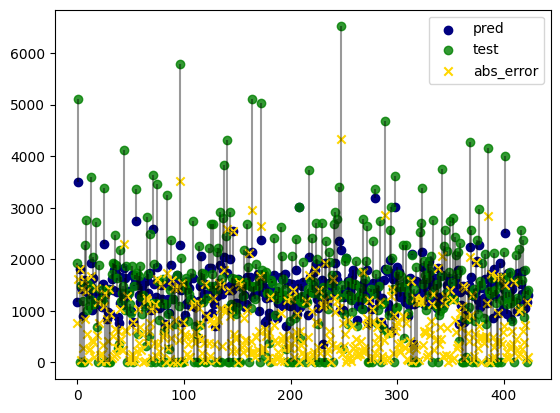

In [134]:
#data visualization
x = np.arange(start=0, stop=len(y_pred), step=1)
# Create the plot
plt.vlines(x=x, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(x, y_pred, color='navy', alpha=1, label='pred')
plt.scatter(x, y_test, color='green', alpha=0.8, label='test')
plt.scatter(x, np.abs(y_pred - y_test), color='gold', label='abs_error', marker='x')
plt.legend()